# Generate forcing fields for the relaxation of the nutrients

In [1]:
indir='../../../output/run_20230324_0000_EXP2_1rbcsno3times1_00sioh4times1_00/'

In [2]:
import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import netcdf_tools
import numpy as np
import os
import os.path

In [3]:
list_no3=np.arange(0.25,2.1,0.25)
list_sioh4=np.arange(0.25,2.1,0.25)

# $\mathrm{ NO_3 }$

In [4]:
prefix_no3='1D_BB_NO3_GE_spring.delZ1016mm.32bits'

## $\mathrm{ NO_3 }$: generate forcing fields

In [5]:
infile_no3=prefix_no3+'.bin'
in_no3=np.fromfile(infile_no3,dtype='>f')

In [6]:
for f_no3 in list_no3:
    out_no3=in_no3*f_no3
    outfile_no3=prefix_no3+'.times.'+'{0:.2f}'.format(f_no3)+'.bin'
    out_no3.astype('>f4').tofile(outfile_no3)

## $\mathrm{ NO_3 }$: verification

In [7]:
gridfile=os.path.join(indir, 'grid.t001.nc')
RC=-netcdf_tools.read_netcdf(gridfile,'RC')

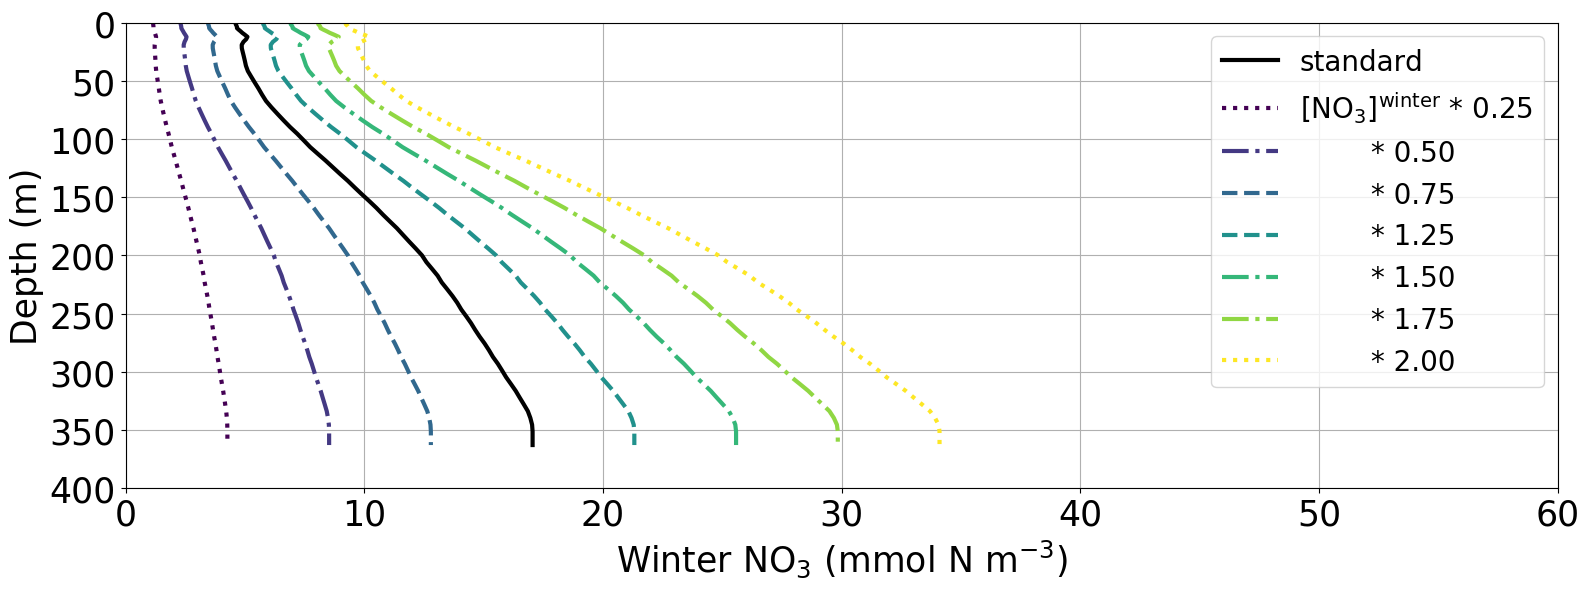

In [8]:
def make_plots(ax):
    
    # --- STANDARD
    in_no3_standard=np.fromfile('1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.1.00.bin',
                                dtype='>f')
    ax.plot(in_no3_standard,RC,color='black',ls='-',label='standard')
    ax.set_xlabel('Winter $\mathrm{ NO_3\ (mmol\ N\ m^{-3}) }$')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,60)
    ax.set_ylim(0,400)
    ax.invert_yaxis()
    ax.grid(True)
    plt.tight_layout()
    
    # --- SENSITIVITY SIMULATIONS
    cc=cycler.cycler(color=plt.cm.viridis(np.linspace(0,1,7)),
                     linestyle=[':','-.','--','--','-.','-.',':'])
    ax.set_prop_cycle(cc)
    
    f=0.25
    infile_no3=prefix_no3+'.times.'+'{0:.2f}'.format(f)+'.bin'
    array1d_idepth_no3=np.fromfile(infile_no3,dtype='>f')
    label='$\mathrm{{ [NO_3]^{{winter}} }}$ * {0:.2f}'.format(f)
    ax.plot(array1d_idepth_no3,RC,label=label)
    
    for f_no3 in [0.50,0.75,1.25,1.50,1.75,2.00]:
        infile_no3=prefix_no3+'.times.'+'{0:.2f}'.format(f_no3)+'.bin'
        array1d_idepth_no3=np.fromfile(infile_no3,dtype='>f')
        label='        * {0:.2f}'.format(f_no3)
        ax.plot(array1d_idepth_no3,RC,label=label)
    ax.legend()
    
with plt.style.context('data_rbcs.mplstyle'):
    fig=plt.figure(figsize=(16,6))
    ax=fig.add_subplot(111)
    make_plots(ax)

    # --- SAVE
    plt.savefig('exp2_1.png')

# $\mathrm{ Si(OH)_4 }$

In [9]:
prefix_sioh4='1D_BB_Si_GE_spring.delZ1016mm.32bits'

## $\mathrm{ Si(OH)_4 }$: generate forcing fields

In [10]:
infile_sioh4=prefix_sioh4+'.bin'
in_sioh4=np.fromfile(infile_sioh4,dtype='>f')

In [11]:
for f_sioh4 in list_sioh4:
    out_sioh4=in_sioh4*f_sioh4
    outfile_sioh4=prefix_sioh4+'.times.'+'{0:.2f}'.format(f_sioh4)+'.bin'
    out_sioh4.astype('>f4').tofile(outfile_sioh4)

## $\mathrm{ Si(OH)_4 }$: verification

In [12]:
gridfile=os.path.join(indir, 'grid.t001.nc')
RC=-netcdf_tools.read_netcdf(gridfile,'RC')

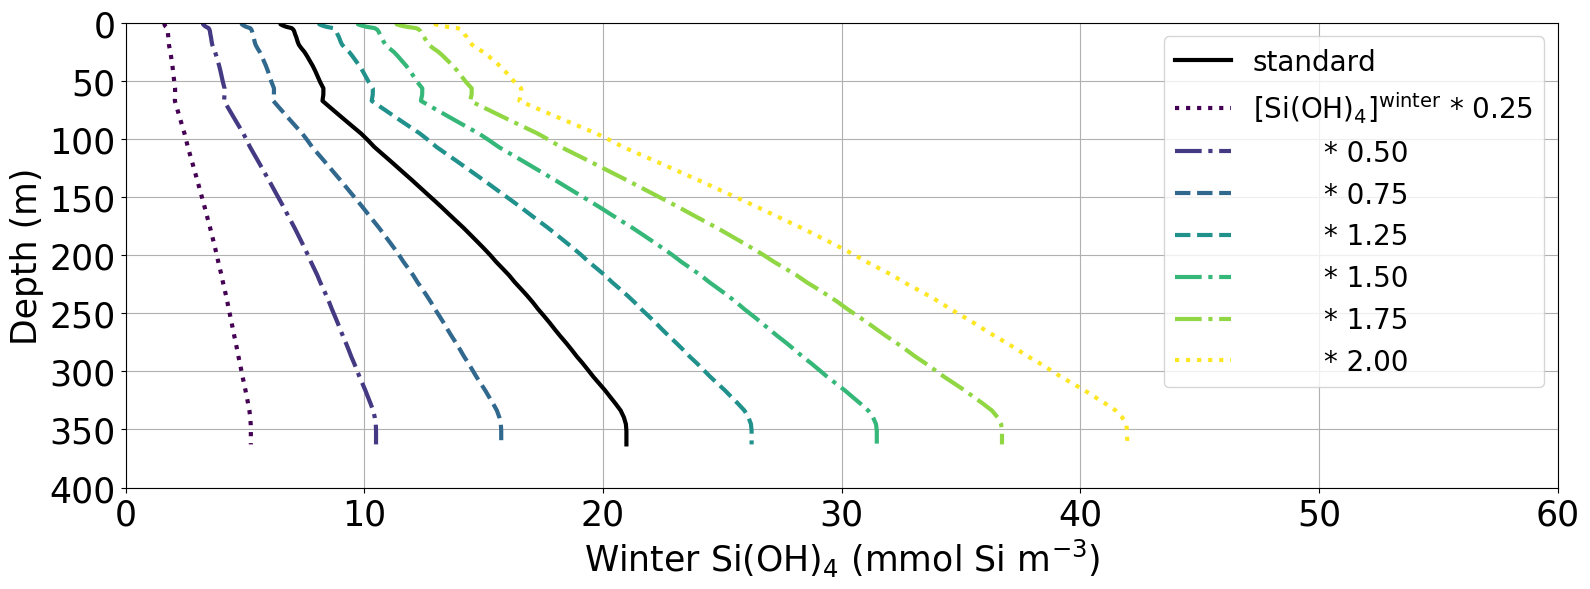

In [13]:
def make_plots(ax):
    
    # --- STANDARD
    in_sioh4_standard=np.fromfile('1D_BB_Si_GE_spring.delZ1016mm.32bits.times.1.00.bin',
                                  dtype='>f')
    ax.plot(in_sioh4_standard,RC,color='black',ls='-',label='standard')
    ax.set_xlabel('Winter $\mathrm{ Si(OH)_4\ (mmol\ Si\ m^{-3}) }$')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,60)
    ax.set_ylim(0,400)
    ax.invert_yaxis()
    ax.grid(True)
    plt.tight_layout()
    
    # --- SENSITIVITY SIMULATIONS
    cc=cycler.cycler(color=plt.cm.viridis(np.linspace(0,1,7)),
                     linestyle=[':','-.','--','--','-.','-.',':'])
    ax.set_prop_cycle(cc)
    
    f=0.25
    infile_sioh4=prefix_sioh4+'.times.'+'{0:.2f}'.format(f)+'.bin'
    array1d_idepth_sioh4=np.fromfile(infile_sioh4,dtype='>f')
    label='$\mathrm{{ [Si(OH)_4]^{{winter}} }}$ * {0:.2f}'.format(f)
    ax.plot(array1d_idepth_sioh4,RC,label=label)
    
    for f_sioh4 in [0.50,0.75,1.25,1.50,1.75,2.00]:
        infile_sioh4=prefix_sioh4+'.times.'+'{0:.2f}'.format(f_sioh4)+'.bin'
        array1d_idepth_sioh4=np.fromfile(infile_sioh4,dtype='>f')
        label='        * {0:.2f}'.format(f_sioh4)
        ax.plot(array1d_idepth_sioh4,RC,label=label)
    ax.legend()
    
with plt.style.context('data_rbcs.mplstyle'):
    fig=plt.figure(figsize=(16,6))
    ax=fig.add_subplot(111)
    make_plots(ax)

    # --- SAVE
    plt.savefig('exp2_2.png')

# Generate rbcs files

In [14]:
text01='''# RBCS package parameters:
 &RBCS_PARM01
  relaxMaskFile(3)='input/rbcs_mask.32bits.bin',
 &

# RBCS for pTracers (read this namelist only when ptracers pkg is compiled)
 &RBCS_PARM02
  useRBCptrnum(4)    = .TRUE.,
  useRBCptrnum(5)    = .TRUE.,
  useRBCptrnum(6)    = .TRUE.,
  tauRelaxPTR(4)     = 2592000.,
  tauRelaxPTR(5)     = 2592000.,
  tauRelaxPTR(6)     = 2592000.,
  relaxPtracerFile(4)='input/1D_BB_NO3_GE_spring.delZ1016mm.32bits.times.'''
text02='''.bin',
  relaxPtracerFile(5)='input/1D_BB_PO4_GE_spring.delZ1016mm.32bits.bin',
  relaxPtracerFile(6)='input/1D_BB_Si_GE_spring.delZ1016mm.32bits.times.'''
text03='''.bin',
 &'''
for f_no3 in list_no3:
    label_no3='{0:.2f}'.format(f_no3)
    for f_sioh4 in list_sioh4:
        label_sioh4='{0:.2f}'.format(f_sioh4)
        outfile='../data.rbcs.no3.times.'+label_no3+'.sioh4.times.'+label_sioh4
        text=text01+label_no3+text02+label_sioh4+text03
        h=open(outfile,'w')
        h.write(text)
        h.close()